In [1]:
import pandas as pd
df = pd.read_csv('heart.csv')
df.head(5)

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,condition
0,69,1,0,160,234,1,2,131,0,0.1,1,1,0,0
1,69,0,0,140,239,0,0,151,0,1.8,0,2,0,0
2,66,0,0,150,226,0,0,114,0,2.6,2,0,0,0
3,65,1,0,138,282,1,2,174,0,1.4,1,1,0,1
4,64,1,0,110,211,0,2,144,1,1.8,1,0,0,0


In [2]:
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 297 entries, 0 to 296
Data columns (total 14 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   age        297 non-null    int64  
 1   sex        297 non-null    int64  
 2   cp         297 non-null    int64  
 3   trestbps   297 non-null    int64  
 4   chol       297 non-null    int64  
 5   fbs        297 non-null    int64  
 6   restecg    297 non-null    int64  
 7   thalach    297 non-null    int64  
 8   exang      297 non-null    int64  
 9   oldpeak    297 non-null    float64
 10  slope      297 non-null    int64  
 11  ca         297 non-null    int64  
 12  thal       297 non-null    int64  
 13  condition  297 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 32.6 KB


In [4]:
df.isnull().sum()

age          0
sex          0
cp           0
trestbps     0
chol         0
fbs          0
restecg      0
thalach      0
exang        0
oldpeak      0
slope        0
ca           0
thal         0
condition    0
dtype: int64

In [5]:
df.shape

(297, 14)

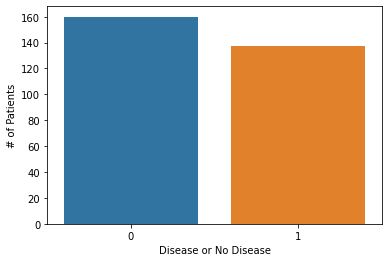

In [6]:
# Exploratory Data Analysis

sns.countplot(x=df.condition)
plt.xlabel("Disease or No Disease")
plt.ylabel("# of Patients")
plt.show()

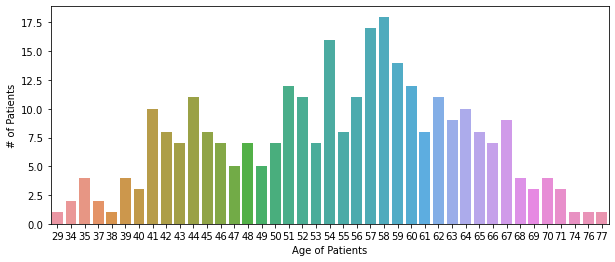

In [7]:
plt.rcParams["figure.figsize"] = (10,4)
sns.countplot(x=df.age)
plt.xlabel("Age of Patients")
plt.ylabel("# of Patients")
plt.show()

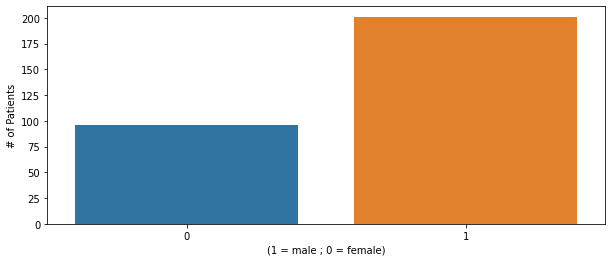

In [8]:
sns.countplot(x=df.sex)
plt.xlabel("(1 = male ; 0 = female)")
plt.ylabel("# of Patients")
plt.show()

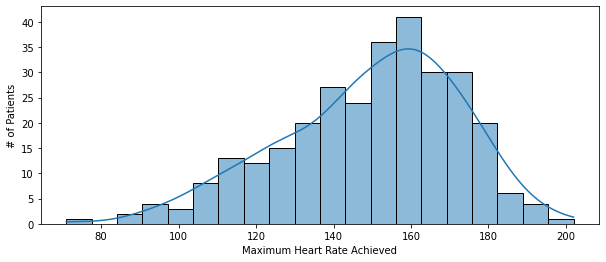

In [9]:
sns.histplot(x=df.thalach,kde=True,bins=20)
plt.xlabel("Maximum Heart Rate Achieved")
plt.ylabel("# of Patients")
plt.show()

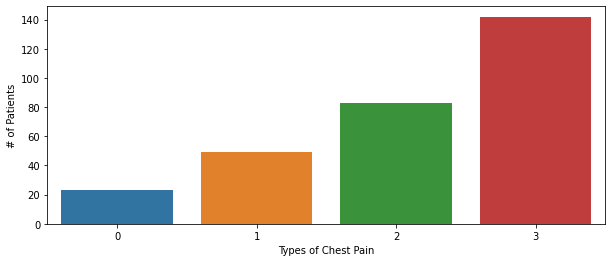

In [10]:
sns.countplot(x=df.cp)
plt.xlabel("Types of Chest Pain")
plt.ylabel("# of Patients")
plt.show()

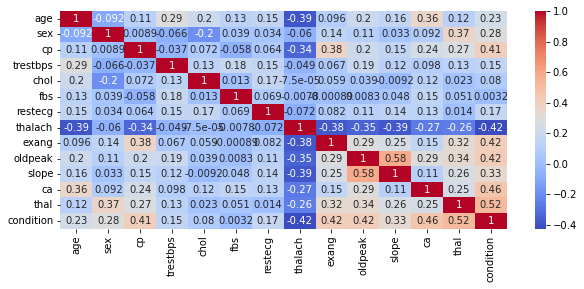

In [11]:
sns.heatmap(df.corr(),annot=True,cmap="coolwarm")
plt.show()

In [12]:
y = df["condition"]
df.drop(columns="condition",inplace=True)
X = df

In [13]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=42)

In [14]:
from sklearn.linear_model import LogisticRegression

clf = LogisticRegression(max_iter=1000)

clf.fit(X_train,y_train)

y_pred = clf.predict(X_test)

from sklearn.metrics import accuracy_score

accuracy_score(y_test,y_pred)

0.7333333333333333

In [15]:
from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier()

rf.fit(X_train,y_train)

y_pred = rf.predict(X_test)

from sklearn.metrics import accuracy_score

accuracy_score(y_test,y_pred)

0.7333333333333333

In [16]:
from sklearn.svm import SVC

svc = SVC()

svc.fit(X_train,y_train)

y_pred = svc.predict(X_test)

from sklearn.metrics import accuracy_score

accuracy_score(y_test,y_pred)

0.5666666666666667

In [17]:
from sklearn.metrics import classification_report

target_names = ["class 0","class 1"]
print(classification_report(y_test,y_pred,target_names=target_names))

              precision    recall  f1-score   support

     class 0       0.57      0.72      0.64        32
     class 1       0.55      0.39      0.46        28

    accuracy                           0.57        60
   macro avg       0.56      0.56      0.55        60
weighted avg       0.56      0.57      0.55        60



In [18]:
from sklearn.metrics import confusion_matrix

print(confusion_matrix(y_test,y_pred))

[[23  9]
 [17 11]]


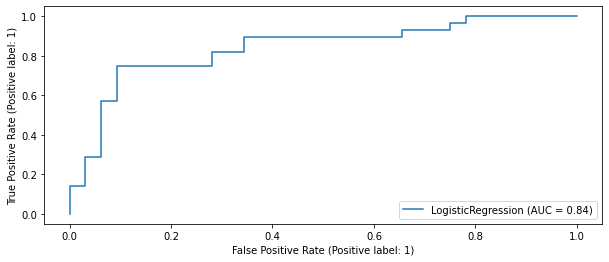

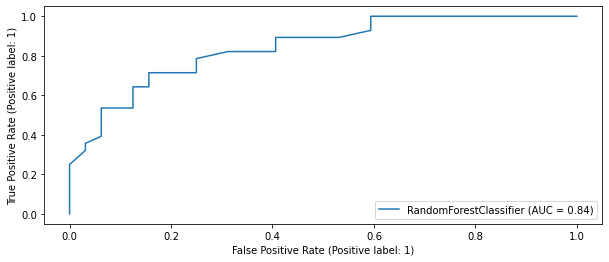

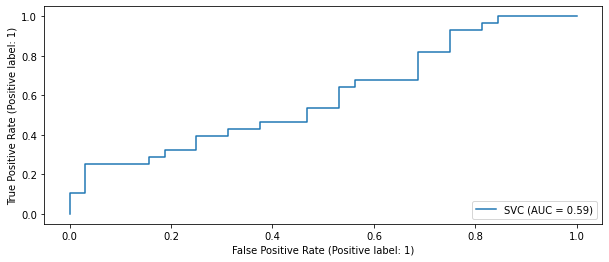

In [19]:
import warnings
warnings.filterwarnings("ignore")

from sklearn import metrics

metrics.plot_roc_curve(clf, X_test, y_test)
metrics.plot_roc_curve(rf, X_test, y_test) 
metrics.plot_roc_curve(svc, X_test, y_test) 


plt.show()